In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

В заданиях 1-3 тестируем реализацию градиентного спуска на функции $f(x, y)=\sin(\dfrac{1}{2}x^2-\dfrac{1}{4}y^2+3)\cos(2x+1-e^y)$

Рассмотрим алгоритм градиентного спуска.
<br> 1) Выбирается начальная точка и точность вычисления ($\epsilon$)
<br> 2) Выбирается следующуя точка, которая находится по форму $x_{k+1} = x_k - t\nabla f(x_k)$, где $t$ - величина шага, а $\nabla f(x_k)$ - значение градиента минимизируемой функции в точке $x_k$
<br> шаг t выбирается в зависимости от исследуемой функции
<br> 3) Повторяем 2 шаг, пока не будет выполнено одно из условий:

# Задание №1

Реализация градиентного спуска с постоянным шагом

In [27]:
def fun(x, y):
    return np.sin(0.5 * x ** 2 - 0.25 * y ** 2 + 3) * np.cos(2 * x + 1 - np.exp(y))

In [28]:
def grad(x, y):
    h = 1e-5
    return [(fun(x + h, y) - fun(x - h, y)) / (2 * h), (fun(x, y + h) - fun(x, y - h)) / (2 * h)]

In [29]:
eps = 0.001

Minimum:  -0.028686040742501185
Number of iterations:  25
Point:  [-0.67865904 -0.15043715]


<Figure size 1440x720 with 0 Axes>

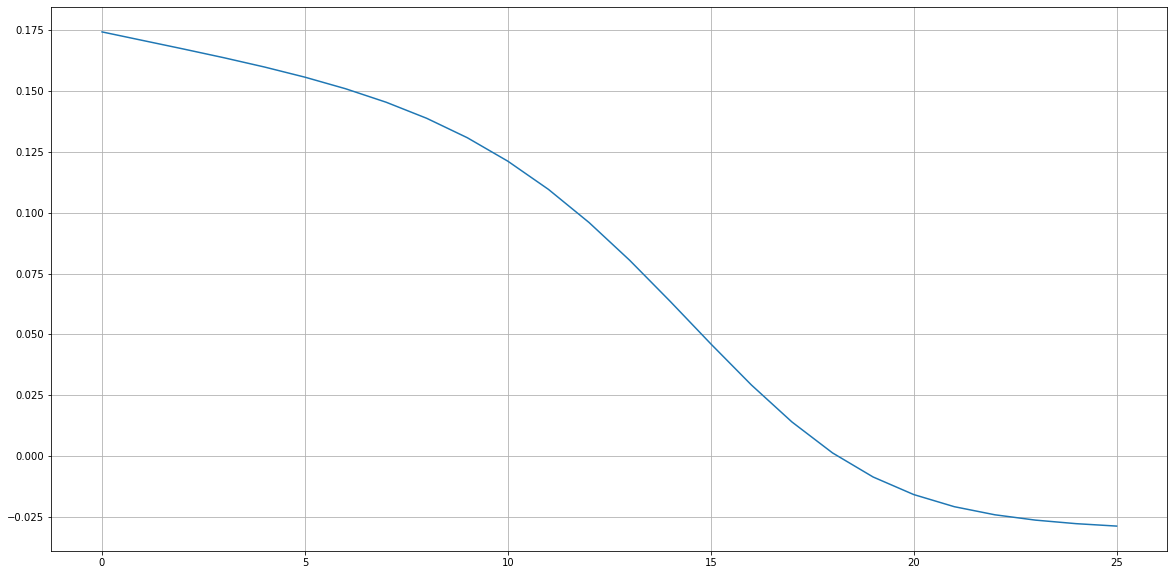

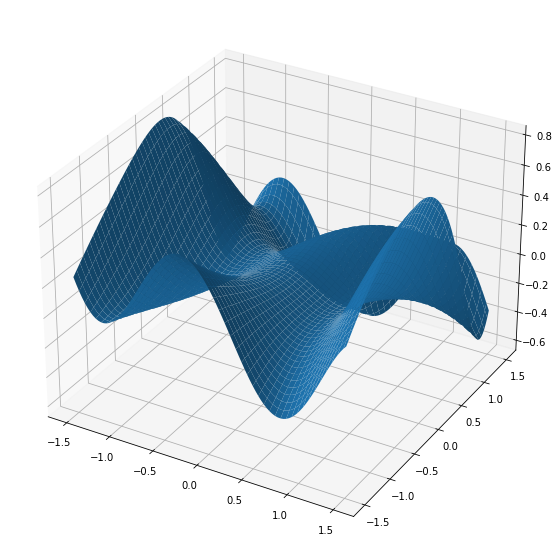

In [30]:
pointMas = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(pointMas, pointMas)

learningRate = 0.1
point = [-0.1, -0.4]

points = []
points.append(list(point))
i = 1
while True:
    point -= learningRate * np.array(grad(point[0], point[1]))
    points.append(list(point))
    if abs(fun(points[i - 1][0], points[i - 1][1]) - fun(points[i][0], points[i][1])) < eps:
        break
    i += 1

figure = plt.figure()
ax1 = plt.figure().add_subplot()
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, fun(X, Y))
array = np.array(points)
ax1.plot(fun(array[:, 0], array[:, 1]))
ax1.grid()
print("Minimum: ", fun(array[-1, 0], array[-1, 1]))
print("Number of iterations: ", i)
print("Point: ", point)
plt.show()

![jupyter](./task_1.png)

# Задание №2
Реализация градиентного спуска с изменяющимся шагом при помощи ступенчатой функции

In [31]:
def get_current_lr(n):
    r = 10
    default_learning_rate = 0.2
    return 0.5 * np.power(default_learning_rate, np.floor(n / r))


Minimum:  -0.03618732518811691
Number of iterations:  193
Point:  [-0.73949789 -0.26070533]


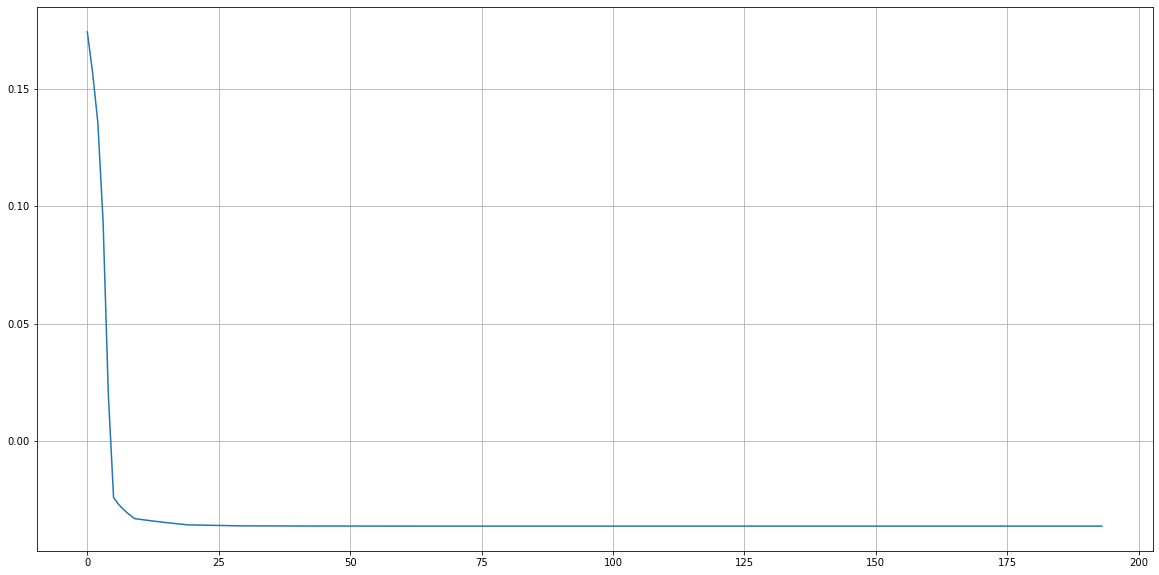

In [32]:
pointMas = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(pointMas, pointMas)

epoch = 30
point = [-0.1, -0.4]

points = []
points.append(list(point))
i = 1
while True:
    learningRate = get_current_lr(i)
    point -= learningRate * np.array(grad(point[0], point[1]))
    points.append(list(point))
    if abs(fun(points[i - 1][0], points[i - 1][1]) - fun(points[i][0], points[i][1])) < 1e-20:
        break
    i += 1

ax1 = plt.figure().add_subplot()
array = np.array(points)
ax1.plot(fun(array[:, 0], array[:, 1]))
ax1.grid()
print("Minimum: ", fun(array[-1, 0], array[-1, 1]))
print("Number of iterations: ", i)
print("Point: ", point)
plt.show()

# Задание №3
Реализация градиентного спуска с помощью метода дихотомии


In [33]:
# Градиент для n-мерных функций
def calc_grad(point1):  # Считаем градиент и подставляем координаты
    res_mas = [0.0] * n
    h = 1e-5
    for i in range(0, n):
        point1[i] -= h
        fun_left = fun(point1)
        point1[i] += 2 * h
        fun_right = fun(point1)
        point1[i] -= h
        res_mas[i] = (fun_right - fun_left) / (2 * h)
    return res_mas


def fun(point1):  # f(x, y)
    x = point1[0]
    y = point1[1]
    #return 2 * point1[0] ** 2 + point1[1] ** 2 + point1[0] * point1[1]
    return 3 * x ** 2 + 5 * y ** 2 - x * y


# f(x, y) только здесь подставляется (точка, градиент, t)
def calc_fun_by_t(point1, grad1, t1):
    temp = [0] * n
    for i in range(0, n):
        temp[i] = point1[i] - t1 * grad1[i]
    return fun(temp)


# Считаем мощность градиента и смотрим не слишком ли он мал
def grad_so_big(g, eps1):
    sum1 = 0.0
    for i in range(0, n):
        sum1 += g[i] ** 2
    if sum1 < eps1:
        return False
    return True


# Поиск оптимальной t по методу дихотомии
def calc_t(point1, grad1):
    a = 0  # Левая граница t
    b = 1  # Правая граница t
    # находим отрезок, так что: f(a) < f(b)
    while calc_fun_by_t(point1, grad1, a) >= calc_fun_by_t(point1, grad1, b):
        if a == 0:
            a = 1
            b = 2
        else:
            a *= 2
            b *= 2
    a = 0
    eps_for_t = 0.001
    T1 = 0
    # Тут по дихотомии ищем t
    while b - a > eps_for_t and T1 < 100:  # Пока отрезок не очень маленький
        T1 += 1
        # print("aboba")
        # Находим середину и две близких точки
        mid = (b + a) / 2
        t1 = mid - eps_for_t
        t2 = mid + eps_for_t
        f_t1 = calc_fun_by_t(point1, grad1, t1)
        f_t2 = calc_fun_by_t(point1, grad1, t2)
        # Сужаем отрезок
        if f_t1 < f_t2:
            b = t2
        else:
            if f_t1 > f_t2:
                a = t1
            else:
                # print(T1)
                return mid
    # print(T1)
    return (b + a) / 2


T = 0
n = 2  # Мерность добавлена для легкого преобразования программы в n-мерную функцию
eps = 1e-20
# Изначальная точкка
point = [1] * n
# Это градиентный спуск. Пока градиент не слишком мал и число итераций не слишком большое, то продолжаем
while grad_so_big(calc_grad(point), eps) and T < 100:
    T += 1
    # print(" T = ", T)
    grad = calc_grad(point)  # Считаем градиент
    # Находим оптимальную t (такую что, f(point - t * np.array(grad)) минимальна) по методу дихотомии
    t = calc_t(point, grad)
    point = point - t * np.array(grad)  # находим новый point
print("Number of operations = ", T)
print("Point = ", point)
print("Minimum = ", fun(point))

Number of operations =  20
Point =  [7.82072581e-12 7.82072581e-12]
Minimum =  4.281462652537765e-22


![jupyter](./task_3.png)

Заметим, что число вызовов fun() для константной и ступенчатой learning rate одинаково, а для дихотомии больше и зависит от максимального значения learning rate(т.к это логарифмическая зависимость, то она сильно не сказывается). По итогу число вызовов fun() для функции с реализацией одномерного поиска learning rate было меньше, чем у других функций.

# Задание №5


Функция 1: $f(x,y)=3x^2+5y^2-xy$
<br>Аналитический этап:
<br>$\dfrac{\partial f(x,y)}{\partial x} = 6x-y$, $\dfrac{\partial f(x,y)}{\partial y} = 10y-x$
<br>$\begin{cases} 6x-y=0 \\ 10y-x=0 \end{cases}$
<br>точка $M(0, 0)$
<br>$\dfrac{\partial^2 f(x,y)}{\partial x^2} = 6$, $\dfrac{\partial^2 f(x,y)}{\partial y^2} = 10$, $\dfrac{\partial^2 f(x, y)}{\partial x \partial y} = -1$
<br>$\begin{vmatrix}6 -1 \\ -1 10 \end{vmatrix}= 58 > 0 \Longrightarrow$ $M(0,0)$ - точка минимума
<br>$f(0,0) = 0$
<br><br> Практический этап:


In [34]:
def fun1(x, y):
    return 3 * x ** 2 + 5 * y ** 2 - x * y

In [35]:
def grad1(x, y):
    h = 1e-5
    return [(fun1(x + h, y) - fun1(x - h, y)) / (2 * h), (fun1(x, y + h) - fun1(x, y - h)) / (2 * h)]

In [36]:
def get_current_lr_for_fun1(n):
    r = 10
    default_learning_rate = 0.2
    return 0.1 * np.power(default_learning_rate, np.floor(n / r))

Minimum:  0.00013924401499984057
Number of iterations:  6
Point:  [0.006765 0.001597]


<Figure size 1440x720 with 0 Axes>

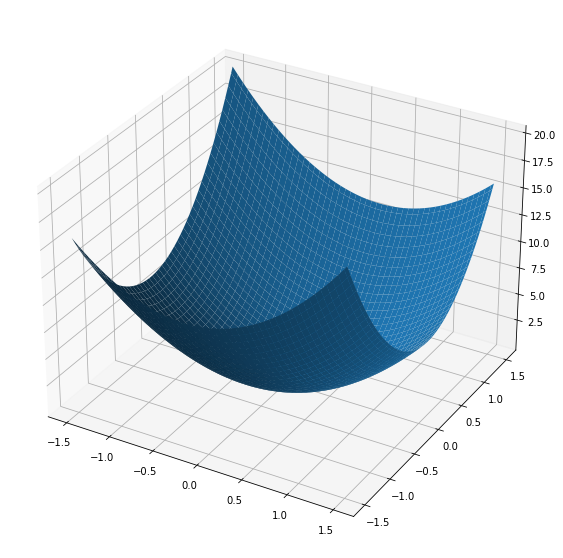

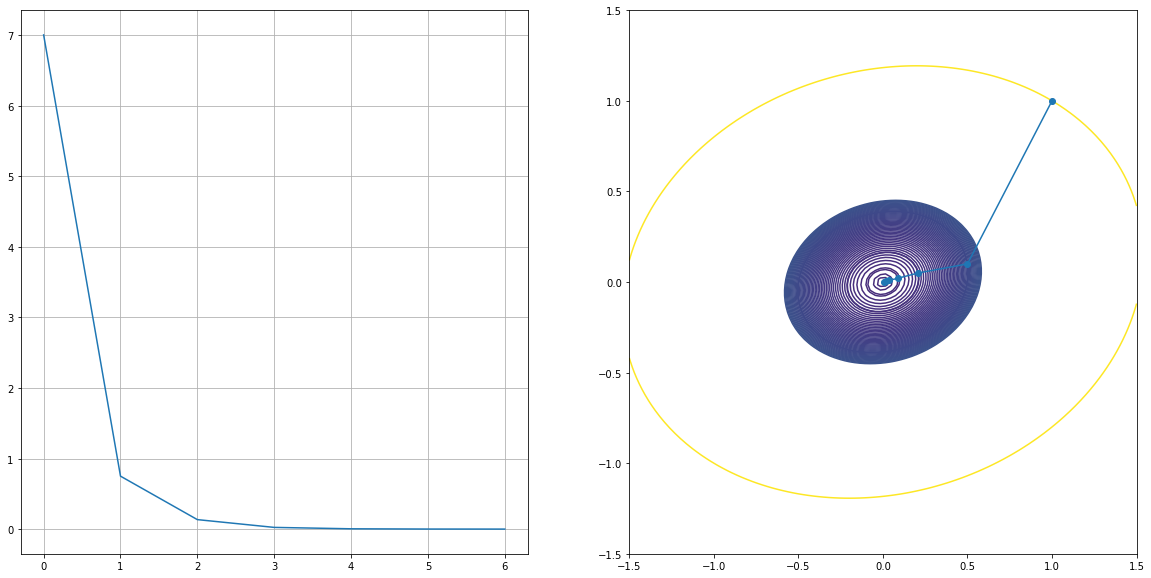

In [43]:
pointMas = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(pointMas, pointMas)

learningRate = 0.1
point = [1, 1]

points = []
points.append(list(point))
i = 1
while True:
    learningRate = get_current_lr_for_fun1(i)
    point -= learningRate * np.array(grad1(point[0], point[1]))
    points.append(list(point))
    if abs(fun1(points[i - 1][0], points[i - 1][1]) - fun1(points[i][0], points[i][1])) < 0.001:
        break
    i += 1

figure = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
array = np.array(points)
ax.plot_surface(X, Y, fun1(X, Y))
ax1.grid()
print("Minimum: ", fun1(array[-1, 0], array[-1, 1]))
print("Number of iterations: ", i)
print("Point: ", point)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(fun1(array[:, 0], array[:, 1]))
ax1.grid()
ax2.plot(array[:, 0], array[:, 1], 'o-')
ax2.contour(X, Y, fun1(X, Y), levels=sorted([fun1(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
plt.show()

![jupyter](./task_5_1.png)

Функция 2: $f(x,y)=\dfrac{2}{3}xy$
<br>Аналитический этап:
<br>$\dfrac{\partial f(x,y)}{\partial x} = \dfrac{2}{3}y$, $\dfrac{\partial f(x,y)}{\partial y} = \dfrac{2}{3}x$
<br>$\begin{cases} \dfrac{2}{3}x=0 \\ \dfrac{2}{3}y=0 \end{cases}$
<br>точка $M(0, 0)$
<br>$\dfrac{\partial^2 f(x,y)}{\partial x^2} = \dfrac{2}{3}$, $\dfrac{\partial^2 f(x,y)}{\partial y^2} = \dfrac{2}{3}$, $\dfrac{\partial^2 f(x, y)}{\partial x \partial y} = 0$
<br>$\begin{vmatrix}\dfrac{2}{3} 0 \\ 0 \dfrac{2}{3} \end{vmatrix}= \dfrac{4}{9} > 0 \Longrightarrow$ $M(0,0)$ - точка минимума
<br>$f(0,0) = 0$
<br><br> Практический этап:

In [118]:
def fun2(x, y):
    return (2/3) * x * y

In [119]:
def grad2(x, y):
    h = 1e-5
    return [(fun2(x + h, y) - fun2(x - h, y)) / (2 * h), (fun2(x, y + h) - fun2(x, y - h)) / (2 * h)]

Minimum:  0.0005709145651310822
Number of iterations:  7
Point:  [0.02926383 0.02926383]


<Figure size 1440x720 with 0 Axes>

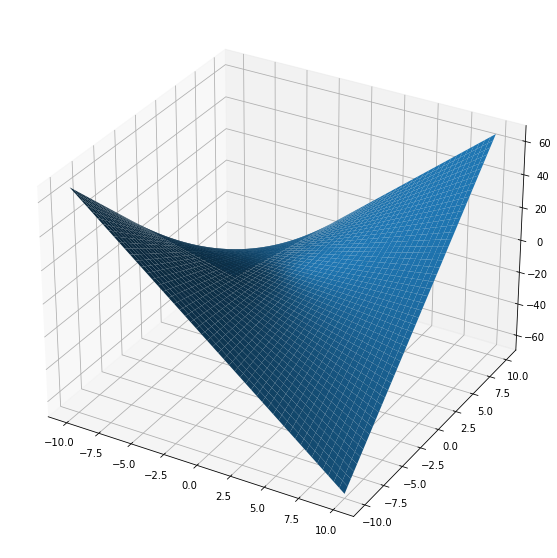

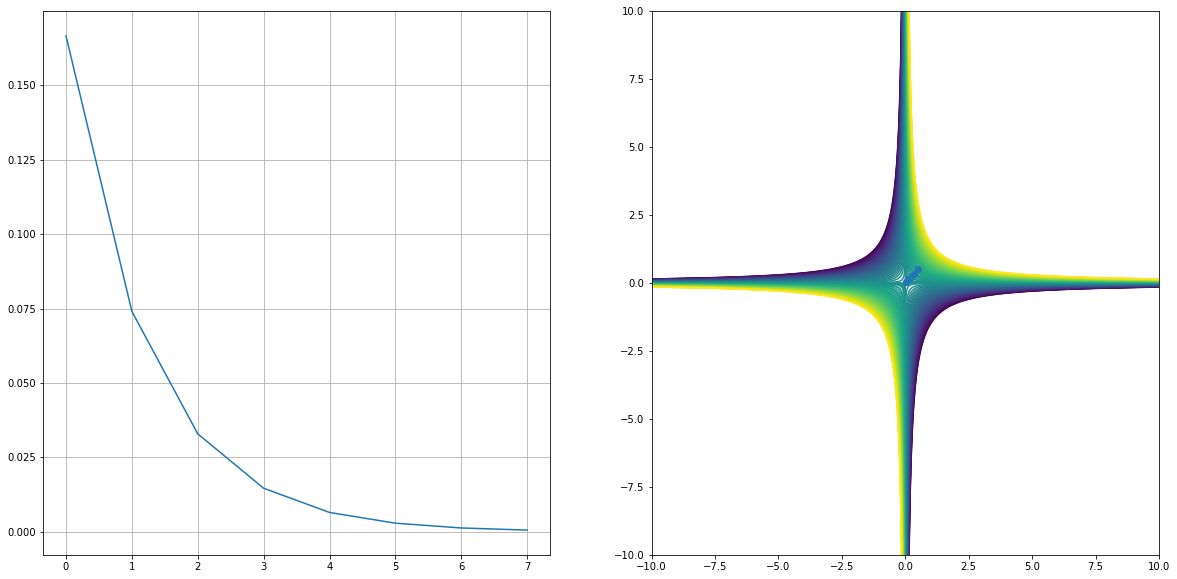

In [122]:
pointMas = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(pointMas, pointMas)

learningRate = 0.1
point = [0.5, 0.5]

points = []
points.append(list(point))
i = 1
while True:
    learningRate = get_current_lr(i)
    point -= learningRate * np.array(grad2(point[0], point[1]))
    points.append(list(point))
    if abs(fun2(points[i - 1][0], points[i - 1][1]) - fun2(points[i][0], points[i][1])) < 0.001:
        break
    i += 1

figure = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
array = np.array(points)
ax.plot_surface(X, Y, fun2(X, Y))
ax1.grid()
print("Minimum: ", fun2(array[-1, 0], array[-1, 1]))
print("Number of iterations: ", i)
print("Point: ", point)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(fun2(array[:, 0], array[:, 1]))
ax1.grid()
ax2.plot(array[:, 0], array[:, 1], 'o-')
ax2.contour(X, Y, fun2(X, Y), levels=sorted([fun2(p[0], p[1]) for p in points] + list(np.linspace(-1, 1, 100))))
plt.show()

Функция 3: $(1-x)^2+3(y-x^2)^2$ - функция Розенброка, где $a=1, b=3$
<br>Аналитический этап:
<br> Функция Розенброка имеет глобальный минимум в точке M(a, a) = M(1, 1)
<br> f(1, 1) = 0
<br><br> Практический этап:

In [44]:
def fun3(x, y):
    return (1 - x) ** 2 + 3 * (y - x ** 2) ** 2

In [45]:
def grad3(x, y):
    h = 1e-5
    return [(fun3(x + h, y) - fun3(x - h, y)) / (2 * h), (fun3(x, y + h) - fun3(x, y - h)) / (2 * h)]

Minimum:  0.03787056055124294
Number of iterations:  30
Point:  [0.81188251 0.63038766]


<Figure size 1440x720 with 0 Axes>

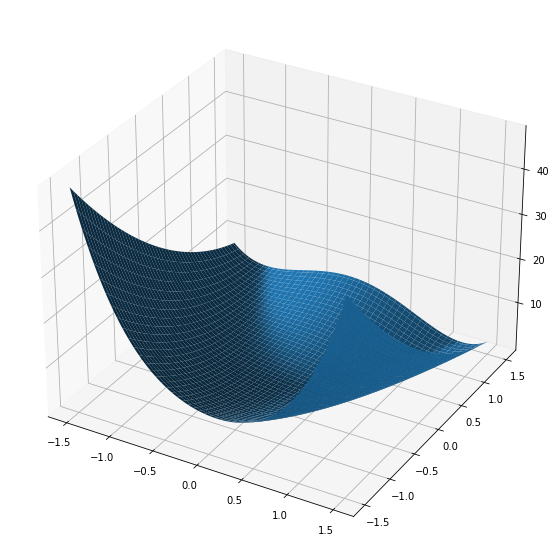

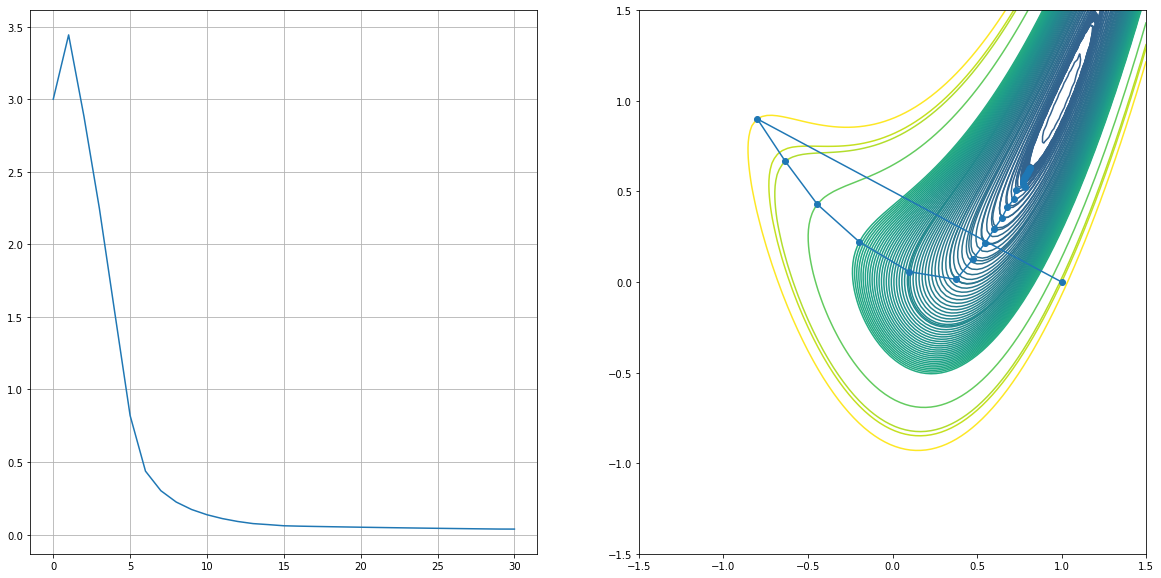

In [116]:
pointMas = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(pointMas, pointMas)

learningRate = 0.1
point = [1.0, 0.0]

points = []
points.append(list(point))
i = 1
while True:
    learningRate = get_current_lr_for_fun3(i)
    point -= learningRate * np.array(grad3(point[0], point[1]))
    points.append(list(point))
    if abs(fun3(points[i - 1][0], points[i - 1][1]) - fun3(points[i][0], points[i][1])) < 0.001:
        break
    i += 1

figure = plt.figure()
array = np.array(points)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, fun3(X, Y))
print("Minimum: ", fun3(array[-1, 0], array[-1, 1]))
print("Number of iterations: ", i)
print("Point: ", point)
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(fun3(array[:, 0], array[:, 1]))
ax1.grid()
ax2.plot(array[:, 0], array[:, 1], 'o-')
ax2.contour(X, Y, fun3(X, Y), levels=sorted([fun3(p[0], p[1]) for p in array] + list(np.linspace(-1.5, 1.5, 100))))
plt.show()

![jupyter](./task_5_3.PNG)

# Задание №6

Проанализируем, как зависит число итераций от размерности пространства n. Сгенерируем n мерную квадратичную функцию и посчитаем для разных n её значение.

![jupyter](./task_6.png)